In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Train file

In [2]:
traindf = pd.read_csv("./DataSets/Airline/train.csv")
traindf.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
traindf.shape

(103904, 25)

# Cleaning Of Train file

## Dropping Variables

#### Unnamed Column

In [4]:
traindf = traindf.drop('Unnamed: 0',axis = 1)

#### Departure Delay in Minutes Column

In [5]:
traindf = traindf.drop('Departure Delay in Minutes',axis = 1)

#### Arrival Delay in Minutes Column

In [6]:
traindf = traindf.drop('Arrival Delay in Minutes',axis = 1)

#### Id Column

In [7]:
traindf = traindf.drop('id',axis = 1)

## Null value Treatment

In [8]:
traindf.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
satisfaction                         0
dtype: int64

## Datatypes Conversion

In [9]:
traindf.dtypes

Gender                               object
Customer Type                        object
Age                                   int64
Type of Travel                       object
Class                                object
Flight Distance                       int64
Inflight wifi service                 int64
Departure/Arrival time convenient     int64
Ease of Online booking                int64
Gate location                         int64
Food and drink                        int64
Online boarding                       int64
Seat comfort                          int64
Inflight entertainment                int64
On-board service                      int64
Leg room service                      int64
Baggage handling                      int64
Checkin service                       int64
Inflight service                      int64
Cleanliness                           int64
satisfaction                         object
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### Gender Column

In [11]:
traindf["Gender"].value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

In [12]:
traindf["Gender"] = le.fit_transform(traindf["Gender"])

In [13]:
traindf["Gender"].value_counts()

0    52727
1    51177
Name: Gender, dtype: int64

#### Customer Type Column

In [14]:
traindf["Customer Type"].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [15]:
traindf["Customer Type"] = le.fit_transform(traindf["Customer Type"])

In [16]:
traindf["Customer Type"].value_counts()

0    84923
1    18981
Name: Customer Type, dtype: int64

#### Type of Travel Column

In [17]:
traindf["Type of Travel"].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [18]:
traindf["Type of Travel"] = le.fit_transform(traindf["Type of Travel"])

In [19]:
traindf["Type of Travel"].value_counts()

0    71655
1    32249
Name: Type of Travel, dtype: int64

#### Class Column

In [20]:
traindf["Class"].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [21]:
traindf["Class"] = le.fit_transform(traindf["Gender"])

In [22]:
traindf["Class"].value_counts()

0    52727
1    51177
Name: Class, dtype: int64

#### Satisfaction Column

In [23]:
traindf["satisfaction"].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [24]:
traindf["satisfaction"] = le.fit_transform(traindf["satisfaction"])

In [25]:
traindf["satisfaction"].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [26]:
traindf.dtypes

Gender                               int32
Customer Type                        int32
Age                                  int64
Type of Travel                       int32
Class                                int64
Flight Distance                      int64
Inflight wifi service                int64
Departure/Arrival time convenient    int64
Ease of Online booking               int64
Gate location                        int64
Food and drink                       int64
Online boarding                      int64
Seat comfort                         int64
Inflight entertainment               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Inflight service                     int64
Cleanliness                          int64
satisfaction                         int32
dtype: object

## Target Count

In [27]:
count = traindf.satisfaction.value_counts()
count

0    58879
1    45025
Name: satisfaction, dtype: int64

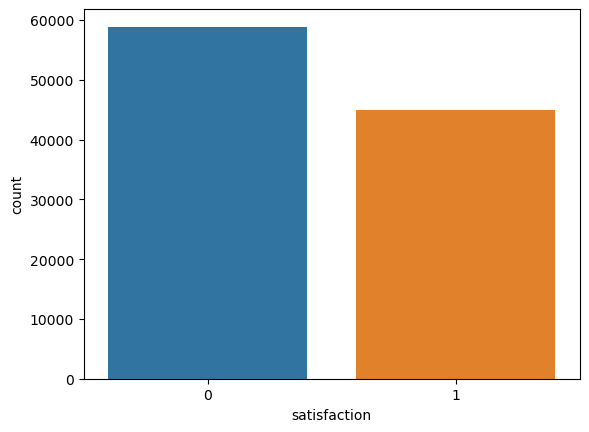

In [28]:
sns.countplot(data=traindf, x='satisfaction')
plt.show()

# Test file

In [29]:
testdf = pd.read_csv("./DataSets/Airline/test.csv")
testdf.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [30]:
testdf.shape

(25976, 25)

# Cleaning of Test file

## Dropping Variables

#### Unnamed Column

In [31]:
testdf = testdf.drop('Unnamed: 0',axis = 1)

#### Departure Delay in Minutes Column

In [32]:
testdf = testdf.drop('Departure Delay in Minutes',axis = 1)

#### Arrival Delay in Minutes Column

In [33]:
testdf = testdf.drop('Arrival Delay in Minutes',axis = 1)

#### id column

In [34]:
testdf = testdf.drop('id',axis = 1)

## Null value treatment

In [35]:
testdf.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
satisfaction                         0
dtype: int64

## Datatype Conversion

In [36]:
testdf.dtypes

Gender                               object
Customer Type                        object
Age                                   int64
Type of Travel                       object
Class                                object
Flight Distance                       int64
Inflight wifi service                 int64
Departure/Arrival time convenient     int64
Ease of Online booking                int64
Gate location                         int64
Food and drink                        int64
Online boarding                       int64
Seat comfort                          int64
Inflight entertainment                int64
On-board service                      int64
Leg room service                      int64
Baggage handling                      int64
Checkin service                       int64
Inflight service                      int64
Cleanliness                           int64
satisfaction                         object
dtype: object

#### Gender Column

In [37]:
testdf["Gender"].value_counts()

Female    13172
Male      12804
Name: Gender, dtype: int64

In [38]:
testdf["Gender"] = le.fit_transform(testdf["Gender"])

In [39]:
testdf["Gender"].value_counts()

0    13172
1    12804
Name: Gender, dtype: int64

#### Customer Type Column

In [40]:
testdf["Customer Type"].value_counts()

Loyal Customer       21177
disloyal Customer     4799
Name: Customer Type, dtype: int64

In [41]:
testdf["Customer Type"] = le.fit_transform(testdf["Customer Type"])

In [42]:
testdf["Customer Type"].value_counts()

0    21177
1     4799
Name: Customer Type, dtype: int64

#### Type of Travel Column

In [43]:
testdf["Type of Travel"].value_counts()

Business travel    18038
Personal Travel     7938
Name: Type of Travel, dtype: int64

In [44]:
testdf["Type of Travel"] = le.fit_transform(testdf["Type of Travel"])

In [45]:
testdf["Type of Travel"].value_counts()

0    18038
1     7938
Name: Type of Travel, dtype: int64

#### Class Column

In [46]:
testdf["Class"].value_counts()

Business    12495
Eco         11564
Eco Plus     1917
Name: Class, dtype: int64

In [47]:
testdf["Class"] = le.fit_transform(testdf["Gender"])

In [48]:
testdf["Class"].value_counts()

0    13172
1    12804
Name: Class, dtype: int64

#### Satisfaction Column

In [49]:
testdf["satisfaction"].value_counts()

neutral or dissatisfied    14573
satisfied                  11403
Name: satisfaction, dtype: int64

In [50]:
testdf["satisfaction"] = le.fit_transform(testdf["satisfaction"])

In [51]:
testdf["satisfaction"].value_counts()

0    14573
1    11403
Name: satisfaction, dtype: int64

In [52]:
testdf.dtypes

Gender                               int32
Customer Type                        int32
Age                                  int64
Type of Travel                       int32
Class                                int64
Flight Distance                      int64
Inflight wifi service                int64
Departure/Arrival time convenient    int64
Ease of Online booking               int64
Gate location                        int64
Food and drink                       int64
Online boarding                      int64
Seat comfort                         int64
Inflight entertainment               int64
On-board service                     int64
Leg room service                     int64
Baggage handling                     int64
Checkin service                      int64
Inflight service                     int64
Cleanliness                          int64
satisfaction                         int32
dtype: object

# Base Models

In [53]:
x_train=traindf.drop(['satisfaction'],axis=1, inplace=False)
x_test=testdf.drop(['satisfaction'],axis=1, inplace=False)
y_train=traindf['satisfaction']
y_test=testdf['satisfaction']

In [54]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((103904, 20), (25976, 20), (103904,), (25976,))

In [55]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

## Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [57]:
lg.fit(x_train, y_train)
lg_p1=lg.predict(x_test)
lg_m1 = confusion_matrix(lg_p1,y_test)
lg_acc1 = lg_m1.diagonal().sum()/lg_m1.sum()*100
lg_acc1

85.20942408376963

In [58]:
print(classification_report(lg_p1,y_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     14529
           1       0.83      0.83      0.83     11447

    accuracy                           0.85     25976
   macro avg       0.85      0.85      0.85     25976
weighted avg       0.85      0.85      0.85     25976



In [59]:
lg_list=[accuracy_score(y_test, lg_p1),precision_score(y_test, lg_p1),recall_score(y_test, lg_p1), f1_score(y_test, lg_p1)]

## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [61]:
dt.fit(x_train,y_train)
dt_p1 = dt.predict(x_test)
dt_m1 = confusion_matrix(dt_p1,y_test)
dt_acc1 = dt_m1.diagonal().sum()/dt_m1.sum()*100
dt_acc1

94.39482599322452

In [62]:
print(classification_report(dt_p1,y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14471
           1       0.94      0.93      0.94     11505

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [63]:
dt_list=[accuracy_score(y_test, dt_p1),precision_score(y_test, dt_p1),recall_score(y_test, dt_p1), f1_score(y_test, dt_p1)]

## Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [65]:
rf.fit(x_train,y_train)
rf_p1 = rf.predict(x_test)
rf_m1 = confusion_matrix(rf_p1,y_test)
rf_acc1 = rf_m1.diagonal().sum()/rf_m1.sum()*100  
rf_acc1

96.23113643363105

In [66]:
print(classification_report(rf_p1,y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     14924
           1       0.94      0.97      0.96     11052

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [67]:
rf_list=[accuracy_score(y_test, rf_p1),precision_score(y_test, rf_p1),recall_score(y_test, rf_p1), f1_score(y_test, rf_p1)]

## Naive Bayes

In [68]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [69]:
nb.fit(x_train,y_train)
nb_p1 = nb.predict(x_test)
nb_m1 = confusion_matrix(nb_p1,y_test)
nb_acc1 = nb_m1.diagonal().sum()/nb_m1.sum()*100
nb_acc1

63.17754850631352

In [70]:
print(classification_report(nb_p1,y_test))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69     16004
           1       0.52      0.59      0.55      9972

    accuracy                           0.63     25976
   macro avg       0.62      0.62      0.62     25976
weighted avg       0.64      0.63      0.64     25976



In [71]:
nb_list=[accuracy_score(y_test, nb_p1),precision_score(y_test, nb_p1),recall_score(y_test, nb_p1), f1_score(y_test, nb_p1)]

## XGBoost

In [72]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [73]:
xgb.fit(x_train,y_train)
xgb_p1 = xgb.predict(x_test)
xgb_m1 = confusion_matrix(xgb_p1,y_test)
xgb_ac1 = xgb_m1.diagonal().sum()/xgb_m1.sum()*100
xgb_ac1

96.2580843855867

In [74]:
print(classification_report(xgb_p1,y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     14897
           1       0.94      0.97      0.96     11079

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [75]:
xgb_list=[accuracy_score(y_test, xgb_p1),precision_score(y_test, xgb_p1),recall_score(y_test, xgb_p1), f1_score(y_test, xgb_p1)]

## Basemodels DF

In [76]:
list1 = {
    "LogisticRegression": lg_list,
    "DecisionTree": dt_list,
    "RandomForest": rf_list,
    "NaiveBayes": nb_list,
    "XGBoost": xgb_list
}

In [77]:
row_names = ["Accuracy", "Precision", "Recall", "F1-Score"]
baseModels = pd.DataFrame(list1,index = row_names)
baseModels

,LogisticRegression,DecisionTree,RandomForest,NaiveBayes,XGBoost
Accuracy,0.852094,0.943948,0.962311,0.631775,0.962581
Precision,0.830261,0.932290,0.971589,0.592158,0.970755
Recall,0.833465,0.940630,0.941682,0.517846,0.943173
F1-Score,0.831860,0.936441,0.956402,0.552515,0.956765


# Exploratory Data Analysis (EDA) 

## Outliers Treatment

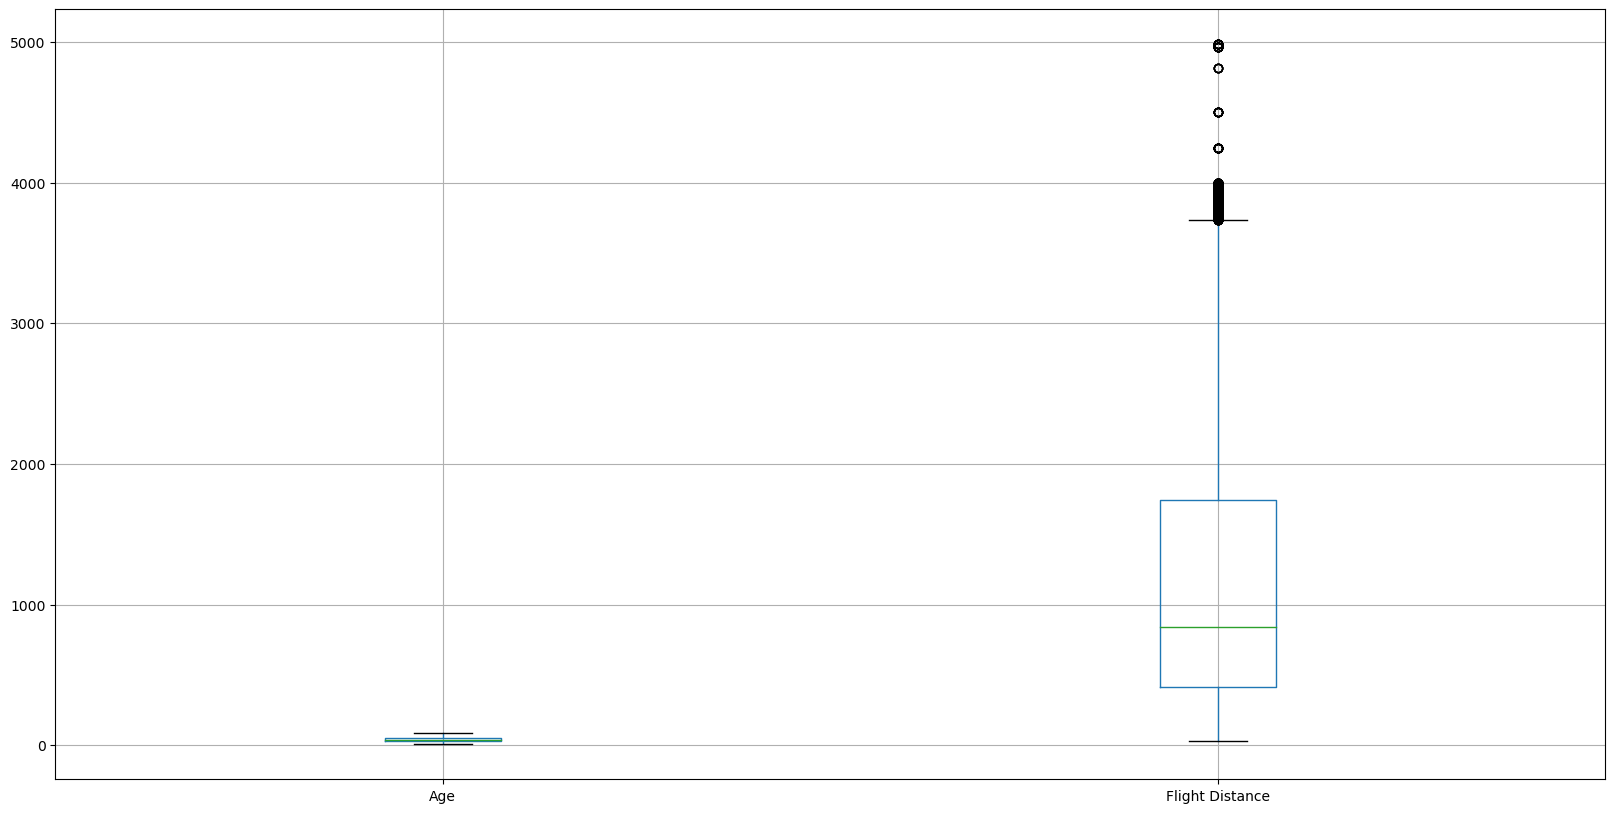

In [78]:
numCol = ["Age","Flight Distance"]
numcol = traindf[numCol]
numcol.boxplot(figsize=(20,10))
plt.show()

#### Flight Distance Column

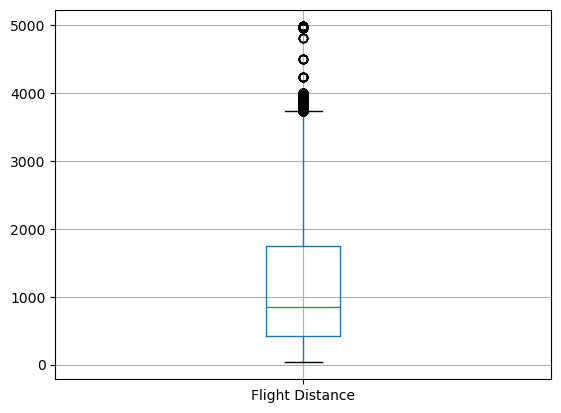

In [79]:
traindf.boxplot(column="Flight Distance")
plt.show()

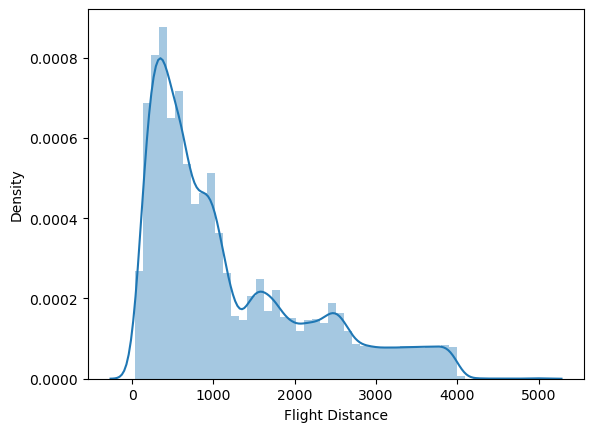

In [80]:
sns.distplot(traindf["Flight Distance"])
plt.show()

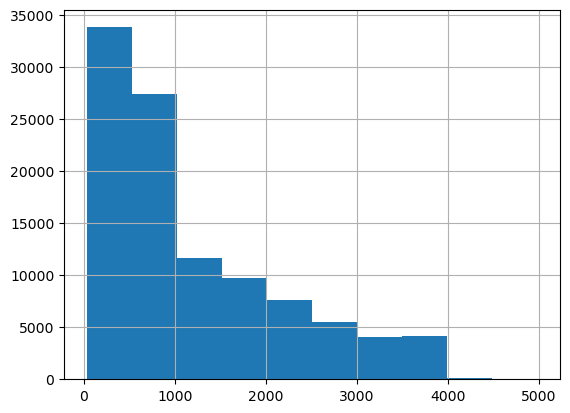

In [81]:
traindf["Flight Distance"].hist()
plt.show()

In [82]:
IQR_F = traindf["Flight Distance"].quantile(0.75) - traindf["Flight Distance"].quantile(0.25)
IQR_F

1329.0

In [83]:
u_b=traindf["Flight Distance"].quantile(0.75) + (IQR_F*3)
print(u_b)

5730.0


In [84]:
traindf.loc[traindf["Flight Distance"]>5730.0,["Flight Distance"]]=5730.0

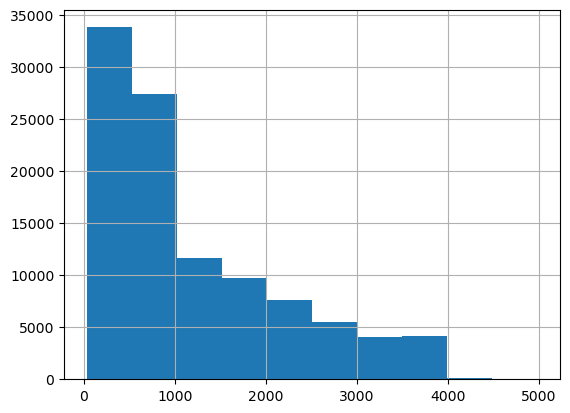

In [85]:
traindf["Flight Distance"].hist()
plt.show()

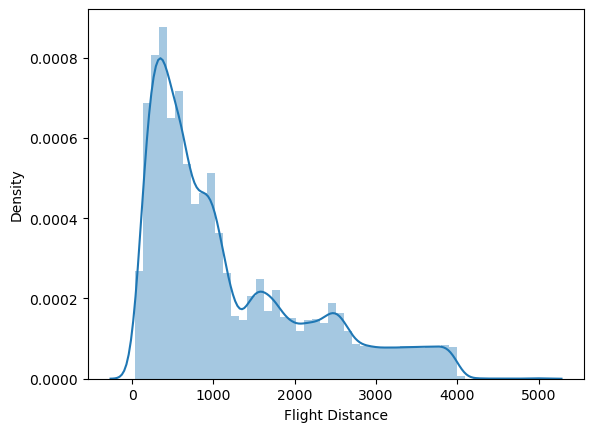

In [86]:
sns.distplot(traindf["Flight Distance"])
plt.show()

## Skewness Treatment

In [87]:
traindf.skew()

Gender                               0.029839
Customer Type                        1.642465
Age                                 -0.004516
Type of Travel                       0.819761
Class                                0.029839
Flight Distance                      1.109466
Inflight wifi service                0.040408
Departure/Arrival time convenient   -0.334399
Ease of Online booking              -0.018294
Gate location                       -0.058889
Food and drink                      -0.151279
Online boarding                     -0.453852
Seat comfort                        -0.482775
Inflight entertainment              -0.365131
On-board service                    -0.420031
Leg room service                    -0.350231
Baggage handling                    -0.677040
Checkin service                     -0.364982
Inflight service                    -0.690314
Cleanliness                         -0.300074
satisfaction                         0.269076
dtype: float64

In [88]:
traindf["Flight Distance"] = np.cbrt(traindf["Flight Distance"])

In [89]:
traindf.skew()

Gender                               0.029839
Customer Type                        1.642465
Age                                 -0.004516
Type of Travel                       0.819761
Class                                0.029839
Flight Distance                      0.311065
Inflight wifi service                0.040408
Departure/Arrival time convenient   -0.334399
Ease of Online booking              -0.018294
Gate location                       -0.058889
Food and drink                      -0.151279
Online boarding                     -0.453852
Seat comfort                        -0.482775
Inflight entertainment              -0.365131
On-board service                    -0.420031
Leg room service                    -0.350231
Baggage handling                    -0.677040
Checkin service                     -0.364982
Inflight service                    -0.690314
Cleanliness                         -0.300074
satisfaction                         0.269076
dtype: float64

## Correlation

In [90]:
import seaborn as sns
traindf_corr=traindf.corr()
traindf_corr

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
Gender,1.000000,-0.031732,0.008928,0.006909,1.000000,0.006440,0.008974,0.009142,0.006951,0.000333,...,-0.042260,-0.026502,0.006117,0.008156,0.031798,0.037391,0.010563,0.039410,0.006505,0.012211
Customer Type,-0.031732,1.000000,-0.281674,-0.308333,-0.031732,-0.210190,-0.007543,-0.206869,-0.019509,0.006078,...,-0.189262,-0.159484,-0.109930,-0.056560,-0.047868,0.024723,-0.032177,0.022670,-0.083613,-0.187638
Age,0.008928,-0.281674,1.000000,-0.048524,0.008928,0.077751,0.017859,0.038125,0.024842,-0.001330,...,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,0.137167
Type of Travel,0.006909,-0.308333,-0.048524,1.000000,0.006909,-0.242225,-0.105085,0.259763,-0.133511,-0.030700,...,-0.224803,-0.124399,-0.148199,-0.056543,-0.138803,-0.031321,0.016751,-0.022599,-0.079207,-0.449000
Class,1.000000,-0.031732,0.008928,0.006909,1.000000,0.006440,0.008974,0.009142,0.006951,0.000333,...,-0.042260,-0.026502,0.006117,0.008156,0.031798,0.037391,0.010563,0.039410,0.006505,0.012211
Flight Distance,0.006440,-0.210190,0.077751,-0.242225,0.006440,1.000000,0.008510,-0.008945,0.072414,0.002927,...,0.206982,0.148000,0.115563,0.104866,0.127677,0.063662,0.076013,0.059721,0.087857,0.275154
Inflight wifi service,0.008974,-0.007543,0.017859,-0.105085,0.008974,0.008510,1.000000,0.343845,0.715856,0.336248,...,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,0.284245
Departure/Arrival time convenient,0.009142,-0.206869,0.038125,0.259763,0.009142,-0.008945,0.343845,1.000000,0.436961,0.444757,...,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,-0.051601
Ease of Online booking,0.006951,-0.019509,0.024842,-0.133511,0.006951,0.072414,0.715856,0.436961,1.000000,0.458655,...,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,0.171705
Gate location,0.000333,0.006078,-0.001330,-0.030700,0.000333,0.002927,0.336248,0.444757,0.458655,1.000000,...,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.000682


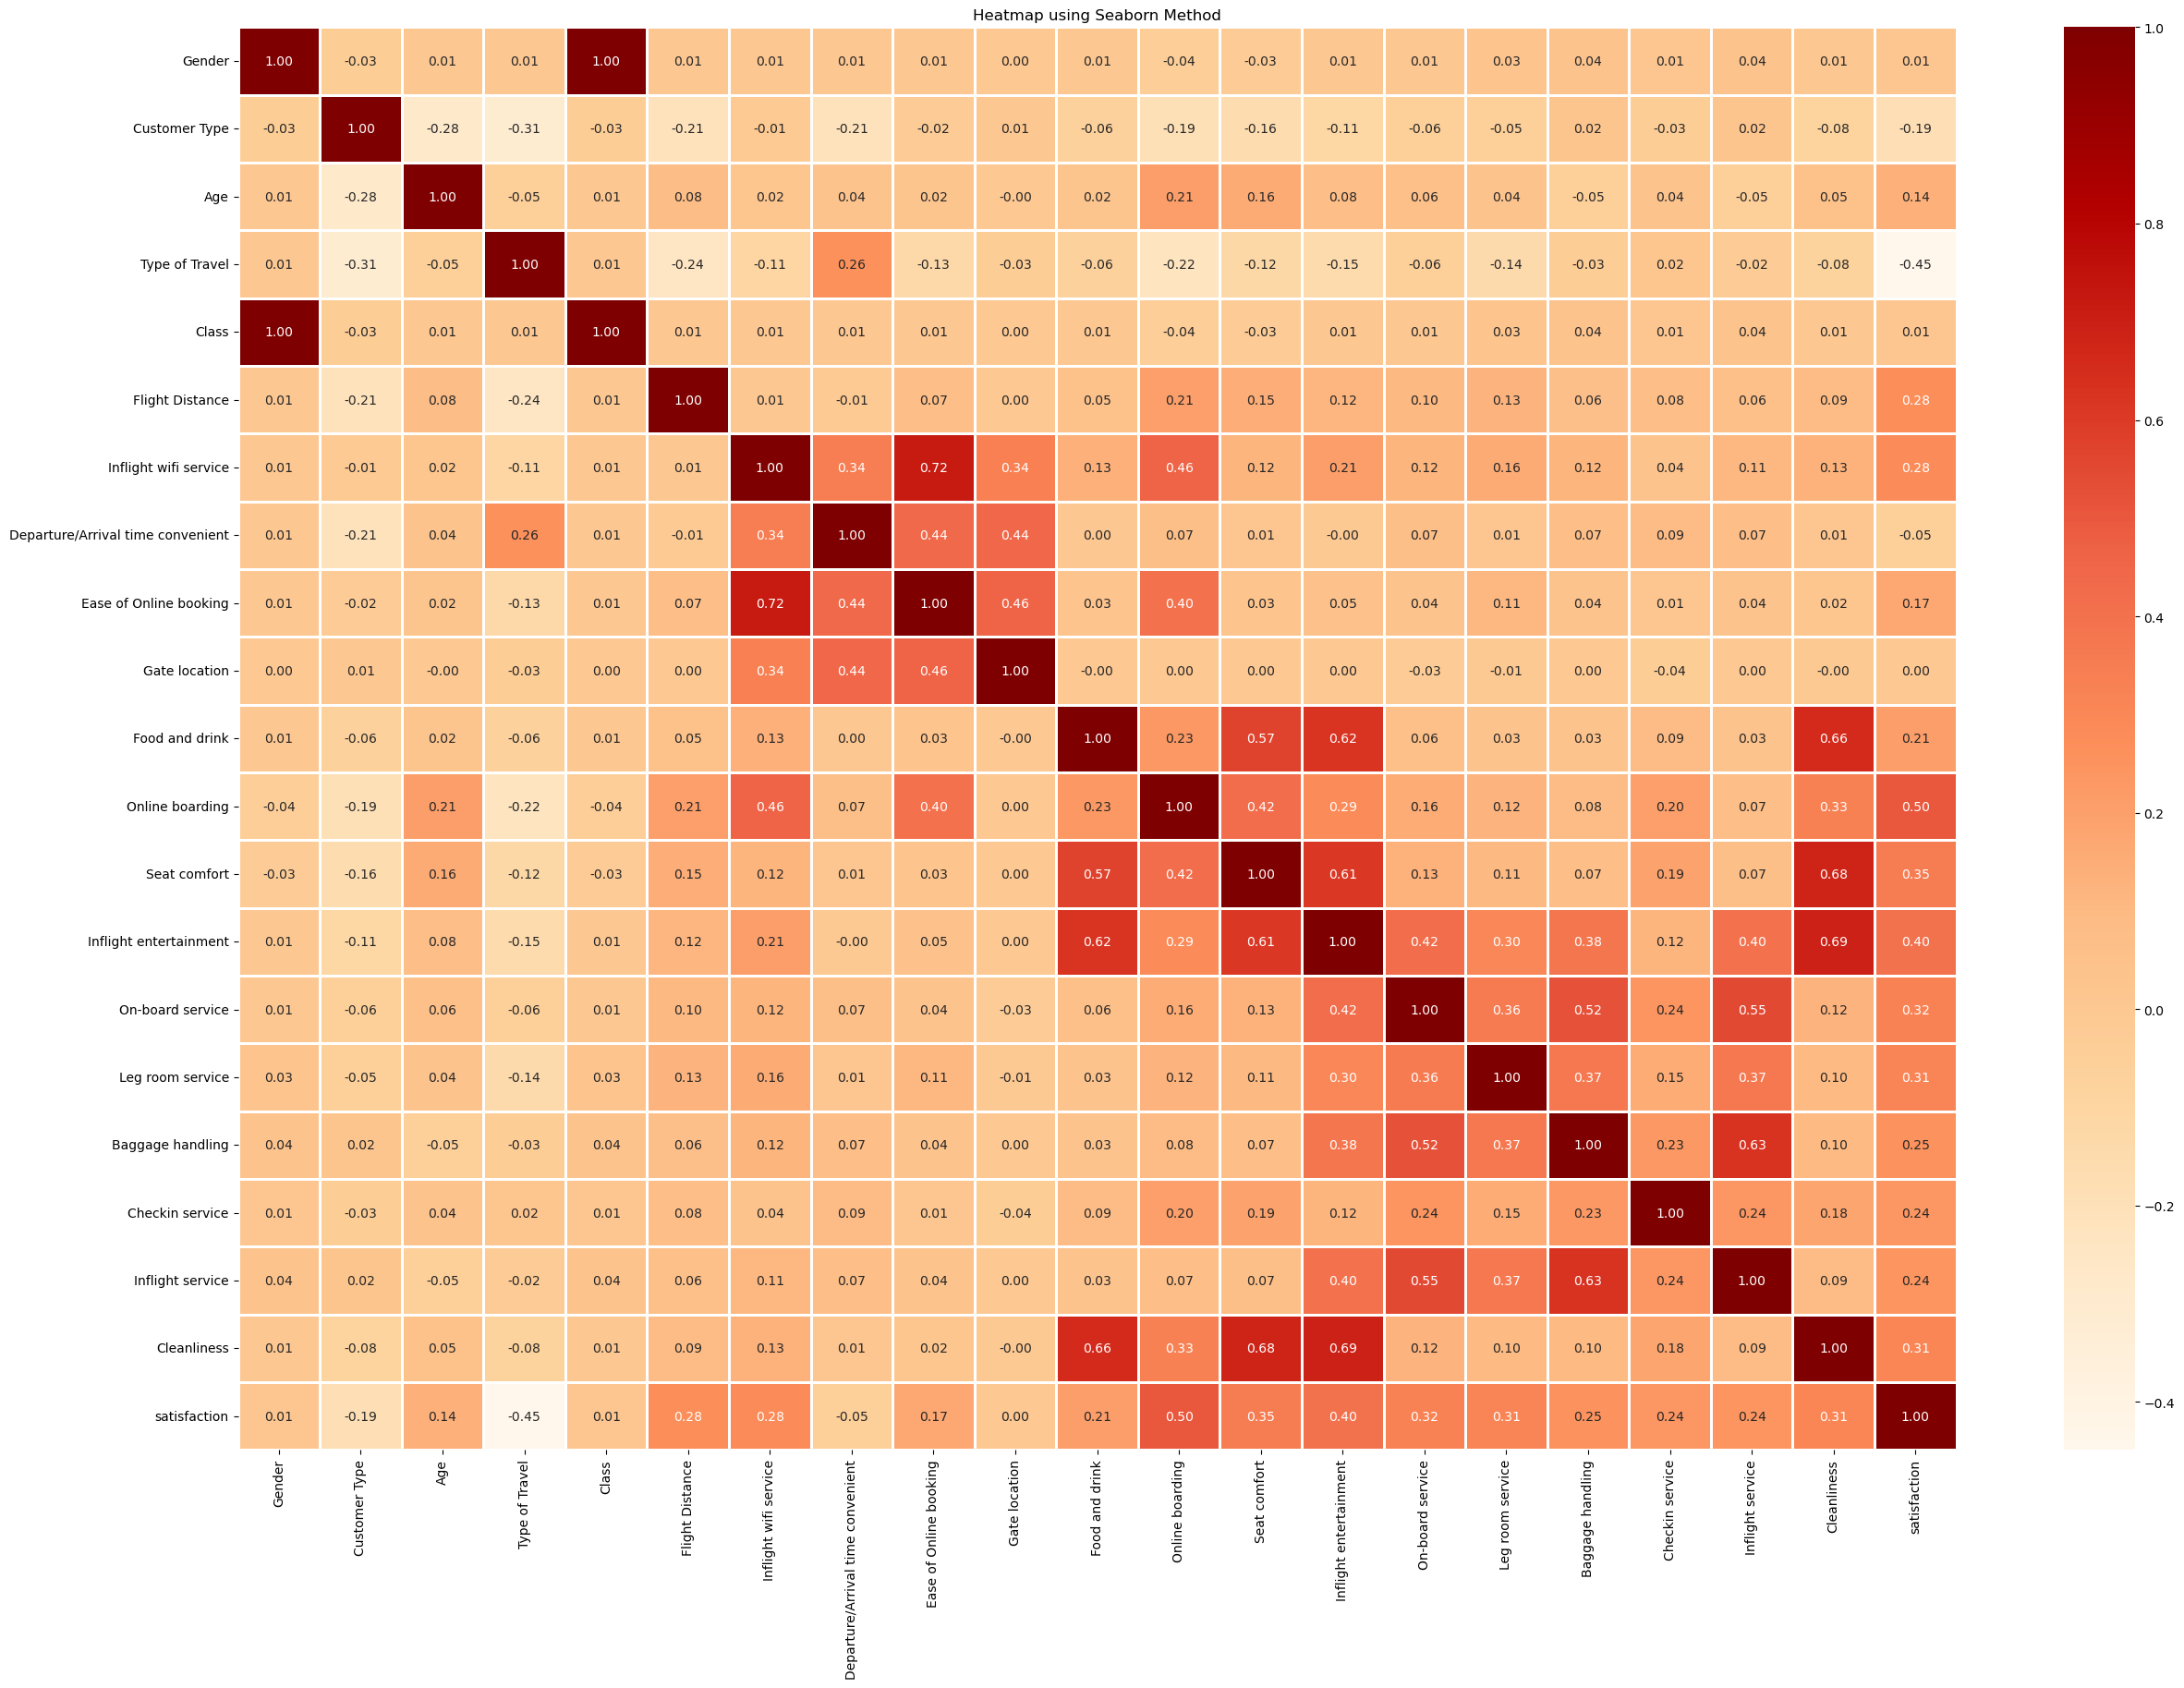

In [91]:
plt.figure(figsize=(30,20))
heatmap=sns.heatmap(traindf_corr,linewidth=1,annot=True,cmap=plt.cm.OrRd,fmt=".2f")
plt.title("Heatmap using Seaborn Method")
plt.show()

# Models After EDA 

In [92]:
x_train2=traindf.drop(['satisfaction'],axis=1, inplace=False)
x_test2=testdf.drop(['satisfaction'],axis=1, inplace=False)
y_train2=traindf['satisfaction']
y_test2=testdf['satisfaction']

In [93]:
x_train2.shape,x_test2.shape,y_train2.shape,y_test2.shape

((103904, 20), (25976, 20), (103904,), (25976,))

## Logistic Regression

In [94]:
lg.fit(x_train2, y_train2)
lg_p2=lg.predict(x_test2)
lg_m2 = confusion_matrix(lg_p2,y_test2)
lg_acc2 = lg_m2.diagonal().sum()/lg_m2.sum()*100
lg_acc2

85.92161995688328

In [95]:
print(classification_report(lg_p2,y_test2))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     14568
           1       0.84      0.84      0.84     11408

    accuracy                           0.86     25976
   macro avg       0.86      0.86      0.86     25976
weighted avg       0.86      0.86      0.86     25976



In [96]:
lg_list2=[accuracy_score(y_test2, lg_p2),precision_score(y_test2, lg_p2),recall_score(y_test2, lg_p2), f1_score(y_test2, lg_p2)]

## Decision Tree

In [97]:
dt.fit(x_train2,y_train2)
dt_p2 = dt.predict(x_test2)
dt_m2 = confusion_matrix(dt_p2,y_test2)
dt_acc2 = dt_m2.diagonal().sum()/dt_m2.sum()*100
dt_acc2

92.87419156144134

In [98]:
print(classification_report(dt_p2,y_test2))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     14156
           1       0.94      0.90      0.92     11820

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



In [99]:
dt_list2=[accuracy_score(y_test2, dt_p2),precision_score(y_test2, dt_p2),recall_score(y_test2, dt_p2), f1_score(y_test2, dt_p2)]

## Random Forest

In [100]:
rf.fit(x_train2,y_train2)
rf_p2 = rf.predict(x_test2)
rf_m2 = confusion_matrix(rf_p2,y_test2)
rf_acc2 = rf_m2.diagonal().sum()/rf_m2.sum()*100   
rf_acc2

95.85771481367415

In [101]:
print(classification_report(rf_p2,y_test2))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     14949
           1       0.94      0.97      0.95     11027

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [102]:
rf_list2=[accuracy_score(y_test2, rf_p2),precision_score(y_test2, rf_p2),recall_score(y_test2, rf_p2), f1_score(y_test2, rf_p2)]

## Naive Bayes

In [103]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [104]:
nb.fit(x_train2,y_train2)
nb_p2 = nb.predict(x_test2)
nb_m2 = confusion_matrix(nb_p2,y_test2)
nb_acc2 = nb_m2.diagonal().sum()/nb_m2.sum()*100
nb_acc2

45.97320603634124

In [105]:
print(classification_report(nb_p2,y_test2))

              precision    recall  f1-score   support

           0       0.04      0.90      0.08       669
           1       0.99      0.45      0.62     25307

    accuracy                           0.46     25976
   macro avg       0.52      0.68      0.35     25976
weighted avg       0.97      0.46      0.60     25976



In [106]:
nb_list2=[accuracy_score(y_test2, nb_p2),precision_score(y_test2, nb_p2),recall_score(y_test2, nb_p2), f1_score(y_test2, nb_p2)]

## XGBoost

In [107]:
xgb.fit(x_train2,y_train2)
xgb_p2 = xgb.predict(x_test2)
xgb_m2 = confusion_matrix(xgb_p2,y_test2)
xgb_ac2 = xgb_m2.diagonal().sum()/xgb_m2.sum()*100
xgb_ac2

94.17154296273483

In [108]:
print(classification_report(xgb_p2,y_test2))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     14117
           1       0.95      0.92      0.93     11859

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [109]:
xgb_list2=[accuracy_score(y_test2, xgb_p2),precision_score(y_test2, xgb_p2),recall_score(y_test2, xgb_p2), f1_score(y_test2, xgb_p2)]

## DF After EDA 

In [110]:
list2 = {
    "LogisticRegression": lg_list2,
    "DecisionTree": dt_list2,
    "RandomForest": rf_list2,
    "NaiveBayes": nb_list2,
    "XGBoost": xgb_list2
}

In [111]:
row_names = ["Accuracy", "Precision", "Recall", "F1-Score"]
ModelsAfterEDA = pd.DataFrame(list2,index = row_names)
ModelsAfterEDA

,LogisticRegression,DecisionTree,RandomForest,NaiveBayes,XGBoost
Accuracy,0.859216,0.928742,0.958577,0.459732,0.941715
Precision,0.839499,0.904061,0.968260,0.448018,0.916941
Recall,0.839867,0.937122,0.936333,0.994300,0.953609
F1-Score,0.839683,0.920295,0.952029,0.617706,0.934915


# Feature Selection using RFE

In [112]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
rfe = RFE(dtree)

In [113]:
rfe.fit(x_train2,y_train2)
rfe.support_
rdf = pd.DataFrame({"feature":list(rfe.support_),"columns":list(x_train2.columns)})
rdf

,feature,columns
0,False,Gender
1,False,Customer Type
2,True,Age
3,True,Type of Travel
4,False,Class
5,True,Flight Distance
6,True,Inflight wifi service
7,False,Departure/Arrival time convenient
8,False,Ease of Online booking
9,True,Gate location


In [114]:
feature_train = x_train2.drop(["Gender","Class","Departure/Arrival time convenient","Ease of Online booking","Food and drink","Seat comfort","On-board service","Leg room service","Cleanliness"],axis =1)
feature_train

,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Gate location,Online boarding,Inflight entertainment,Baggage handling,Checkin service,Inflight service
0,0,13,1,7.719443,3,1,3,5,4,4,5
1,1,25,0,6.171006,3,3,3,1,3,1,4
2,0,26,0,10.452545,2,2,5,5,4,4,4
3,0,25,0,8.252372,2,5,2,2,3,1,4
4,0,61,0,5.981424,3,3,5,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...
103899,1,23,0,5.768998,2,3,2,2,4,2,3
103900,0,49,0,13.289369,4,4,4,5,5,5,5
103901,1,30,0,12.588702,1,3,1,4,4,5,5
103902,1,22,0,10.000000,1,5,1,1,1,5,4


# Models After FS

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(feature_train,  
                                        y_train2,
                                        test_size=.2,
                                        random_state=101)

In [117]:
x_train3.shape,x_test3.shape,y_train3.shape,y_test3.shape

((83123, 11), (20781, 11), (83123,), (20781,))

## Logistic Regression

In [118]:
lg.fit(x_train3, y_train3)
lg_p3=lg.predict(x_test3)
lg_m3 = confusion_matrix(lg_p3,y_test3)
lg_acc3 = lg_m3.diagonal().sum()/lg_m3.sum()*100
lg_acc3

86.16043501275203

In [119]:
print(classification_report(lg_p3,y_test3))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     11900
           1       0.83      0.84      0.84      8881

    accuracy                           0.86     20781
   macro avg       0.86      0.86      0.86     20781
weighted avg       0.86      0.86      0.86     20781



In [120]:
lg_list3=[accuracy_score(y_test3, lg_p3),precision_score(y_test3, lg_p3),recall_score(y_test3, lg_p3), f1_score(y_test3, lg_p3)]

## Decision Tree

In [121]:
dt.fit(x_train3,y_train3)
dt_p3 = dt.predict(x_test3)
dt_m3 = confusion_matrix(dt_p3,y_test3)
dt_acc3 = dt_m3.diagonal().sum()/dt_m3.sum()*100
dt_acc3

93.81165487705115

In [122]:
print(classification_report(dt_p3,y_test3))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     11702
           1       0.93      0.92      0.93      9079

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



In [123]:
dt_list3=[accuracy_score(y_test3, dt_p3),precision_score(y_test3, dt_p3),recall_score(y_test3, dt_p3), f1_score(y_test3, dt_p3)]

## Random Forest

In [124]:
rf.fit(x_train3,y_train3)
rf_p3 = rf.predict(x_test3)
rf_m3 = confusion_matrix(rf_p3,y_test3)
rf_acc3 = rf_m3.diagonal().sum()/rf_m3.sum()*100   
rf_acc3

95.77017467879313

In [125]:
print(classification_report(rf_p3,y_test3))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     12061
           1       0.94      0.96      0.95      8720

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [126]:
rf_list3=[accuracy_score(y_test3, rf_p3),precision_score(y_test3, rf_p3),recall_score(y_test3, rf_p3), f1_score(y_test3, rf_p3)]

## Naive Bayes

In [127]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [128]:
nb.fit(x_train3,y_train3)
nb_p3 = nb.predict(x_test3)
nb_m3 = confusion_matrix(nb_p3,y_test3)
nb_acc3 = nb_m3.diagonal().sum()/nb_m3.sum()*100
nb_acc3

84.14898224339541

In [129]:
print(classification_report(nb_p3,y_test3))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     11964
           1       0.81      0.82      0.81      8817

    accuracy                           0.84     20781
   macro avg       0.84      0.84      0.84     20781
weighted avg       0.84      0.84      0.84     20781



In [130]:
nb_list3=[accuracy_score(y_test3, nb_p3),precision_score(y_test3, nb_p3),recall_score(y_test3, nb_p3), f1_score(y_test3, nb_p3)]

## XGBoost

In [131]:
xgb.fit(x_train3,y_train3)
xgb_p3 = xgb.predict(x_test3)
xgb_m3 = confusion_matrix(xgb_p3,y_test3)
xgb_ac3 = xgb_m3.diagonal().sum()/xgb_m3.sum()*100
xgb_ac3

95.77498676675809

In [132]:
print(classification_report(xgb_p3,y_test3))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     12054
           1       0.94      0.96      0.95      8727

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [133]:
xgb_list3=[accuracy_score(y_test3, xgb_p3),precision_score(y_test3, xgb_p3),recall_score(y_test3, xgb_p3), f1_score(y_test3, xgb_p3)]

## DF After FS 

In [134]:
list3 = {
    "LogisticRegression": lg_list3,
    "DecisionTree": dt_list3,
    "RandomForest": rf_list3,
    "NaiveBayes": nb_list3,
    "XGBoost": xgb_list3
}

In [135]:
row_names = ["Accuracy", "Precision", "Recall", "F1-Score"]
ModelsAfterFS = pd.DataFrame(list3,index = row_names)
ModelsAfterFS

,LogisticRegression,DecisionTree,RandomForest,NaiveBayes,XGBoost
Accuracy,0.861604,0.938117,0.957702,0.841490,0.957750
Precision,0.842923,0.923009,0.963761,0.821708,0.963447
Recall,0.834839,0.934538,0.937214,0.807963,0.937660
F1-Score,0.838861,0.928738,0.950302,0.814777,0.950379


- Based on all these results, it seems reasonable to conclude that the **feature selected Random Forest model** is the selected model, as it has the highest accuracy and performs well across all other key metrics, making it a strong choice for classification task.

# AUCROC for feature selected Random Forest model

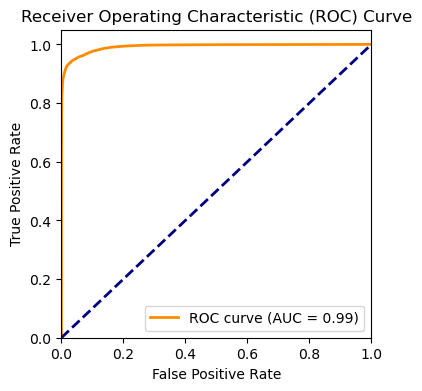

In [136]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have already trained your model and made predictions (rf_p3 and y_test3)

# Calculate the predicted probabilities for the positive class
rf_probabilities = rf.predict_proba(x_test3)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test3, rf_probabilities)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test3, rf_probabilities)

# Plot the ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Cross Validation

## Stratified K Fold cross validation

In [137]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split

# Initialize the classifier (replace with your chosen classifier)
classifier = RandomForestClassifier()

# Specify the number of desired folds (K)
n_splits = 5  # For example, use 5-fold cross-validation

# Create the StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation and collect performance metrics (e.g., accuracy)
scores = cross_val_score(classifier, x_train3, y_train3, cv=stratified_kfold, scoring='accuracy')
print("Accuracy Scores for Each Fold:", scores)

# Calculate and print the average accuracy and its standard deviation
average_accuracy = scores.mean()
std_deviation = scores.std()
print(f'Average Accuracy: {average_accuracy:.4f} (±{std_deviation:.5f})')


Accuracy Scores for Each Fold: [0.95747368 0.95554887 0.95560902 0.95584697 0.95500481]
Average Accuracy: 0.9559 (±0.00084)


# Conclusion

#### Before EDA (Exploratory Data Analysis):
1. Logistic Regression and Decision Tree models have decent accuracy but relatively lower precision and recall. The F1-Score is moderate.
2. **Random Forest and XGBoost** models perform well in terms of accuracy, precision, recall, and F1-Score.
3. Naive Bayes has the lowest accuracy and F1-Score among the models, indicating it may not be well-suited for this dataset.

#### After EDA (Exploratory Data Analysis):
1. Logistic Regression's performance improved slightly, with better precision, recall, and F1-Score.
2. Decision Tree's accuracy increased significantly, and it now has a balanced precision and recall.
3. **Random Forest** maintained its high accuracy and precision, and its recall improved.
4. Naive Bayes saw a substantial improvement in recall but still has low precision, making it sensitive to false positives.
5. XGBoost's performance remains strong.

#### After Feature Selection (FS):
1. Logistic Regression's accuracy improved slightly, and precision and recall are well-balanced.
2. Decision Tree's accuracy improved further, and it still has a balanced precision and recall.
3. **Random Forest** maintained its high accuracy, precision, and recall, making it a robust choice.
4. Naive Bayes saw a decrease in accuracy and recall but maintained a relatively good F1-Score.
5. XGBoost maintained its strong performance, with high accuracy, precision, and recall.